In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("Umfrage-Ermittlung_Kundenprofil.csv")

In [3]:
df.head()

,ID,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38
0,1,weiblich,Ich bin single,Nein,12,"Mit meiner Familie (Eltern, Partner*in und/ode...",keinen Schulabschluss,Ich bin Schüler(in),Nein,NaN,...,Nein,6,Schüler,Nein,Ich koche überwiegend selbst,NaN,Schwierig,schlecht,YouTube;Facebook;Freundes/Familenkreis;,NaN
1,2,weiblich,Ich bin single,Nein,23,Mit meiner bzw. meiner (Ehe-)Partner/in (ohne ...,Studienabschluss,Ich bin Student(in),Nein,NaN,...,Ja,5,NaN,Ja,Ich esse/koche überwiegend zu Hause,NaN,Schwierig,gut,Google;Freundes/Familenkreis;,NaN
2,3,weiblich,Ich bin single,Nein,23,Allein lebend,Studienabschluss,Ich bin Student(in),Ja,Laktose,...,Nein,8,NaN,Ja,Ich esse/koche überwiegend zu Hause,NaN,Schwierig,gut,Google;,Hallo
3,4,weiblich,Ich bin in einer Partnerschaft/ Beziehung,Nein,23,Mit meiner bzw. meiner (Ehe-)Partner/in (ohne ...,Studienabschluss,Ich bin Student(in),Nein,NaN,...,Ja,6,NaN,Ja,Ich esse/koche überwiegend zu Hause,NaN,Schwierig,gut,Google;Instagram;Freundes/Familenkreis;Zeitsch...,"Eine App, die Zutaten, die man im Kühlschrank ..."
4,5,männlich,Ich bin in einer Partnerschaft/ Beziehung,Nein,25,In einer Wohngemeinschaft,Studienabschluss,Ich bin Student(in),Nein,NaN,...,Nein,4,NaN,Ja,Ich esse/koche überwiegend zu Hause,NaN,Schwierig,gut,Freundes/Familenkreis;,NaN


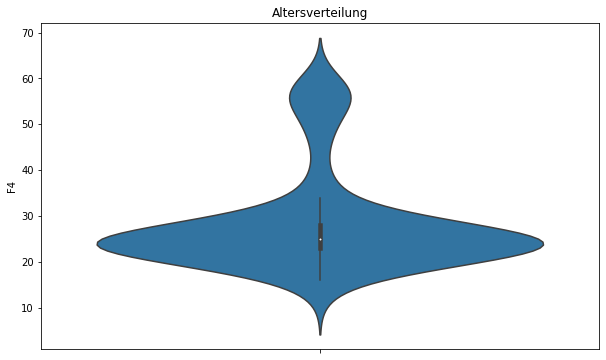

In [5]:
plt.figure(figsize=(10,6))
plt.title("Altersverteilung")
sns.axes_style("dark")
sns.violinplot(y=df["F4"])
plt.show()

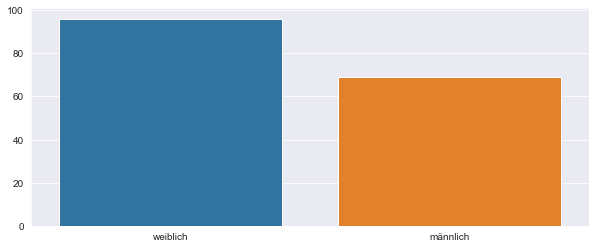

In [6]:
genders = df[df.columns[0]].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [20]:
#Geschlecht
print(df.groupby('F1')['ID'].nunique())


F1
männlich    68
weiblich    96
Name: ID, dtype: int64


In [22]:
#Alter
print(df["F4"].describe())

count    165.000000
mean      28.266667
std       10.876319
min       12.000000
25%       23.000000
50%       25.000000
75%       28.000000
max       61.000000
Name: F4, dtype: float64


In [26]:
df_berufe = df.groupby('F31')['ID'].nunique()
print(df_berufe)
df_berufe.to_csv("Berufe_Liste.csv")

F31
Accounting Manager                          1
Angestellte                                 1
Angestellter im Versicherungsinnendienst    1
Beamter                                     1
Beamtin                                     1
                                           ..
Verwaltungsangestellte                      1
Wirtschaftsinformatiker                     1
Wissenschaftlicher Mitarbeiter (Uni)        1
Zahnmedizinische Fachangestellte            1
Übersetzer                                  1
Name: ID, Length: 64, dtype: int64


In [27]:
df_intoleranz = df.groupby('F9')['ID'].nunique()
print(df_intoleranz)
df_intoleranz.to_csv("Intoleranz_Liste.csv")

F9
 Laktoseintoleranz                                                         1
Alle                                                                       1
Allergie gegen Hausstaub, div. Bäume, Gräser und Kräuter                   1
Asthma, Laktoseintoleranz                                                  1
Colitis ulcerosa (Darmerkrakung)                                           1
Erdnuss                                                                    1
Fructose                                                                   1
Fructoseintoleranz                                                         1
Fruktose Intoleranz                                                        1
Fruktoseintoleranz                                                         1
Gräser                                                                     1
Gräser und Getreide                                                        1
Hashimoto                                                                

<AxesSubplot:xlabel='F4'>

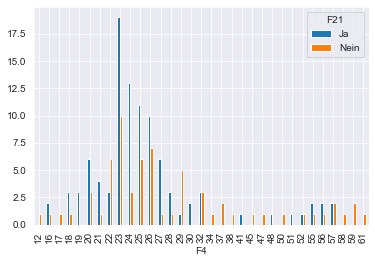

In [29]:
df_app=df.groupby(['F4','F21']).size()
df_app=df_app.unstack()
df_app.plot(kind='bar')

In [43]:
bins= [0,18,26,30,40,60]
labels = ['bis18','19-26','27-30','31-40','41-61']
df['Altersgruppe'] = pd.cut(df['F4'], bins=bins, labels=labels, right=False)
print (df['Altersgruppe'])


0      bis18
1      19-26
2      19-26
3      19-26
4      19-26
       ...  
160    41-61
161    19-26
162    19-26
163    27-30
164    27-30
Name: Altersgruppe, Length: 165, dtype: category
Categories (5, object): ['bis18' < '19-26' < '27-30' < '31-40' < '41-61']


<AxesSubplot:xlabel='Altersgruppe'>

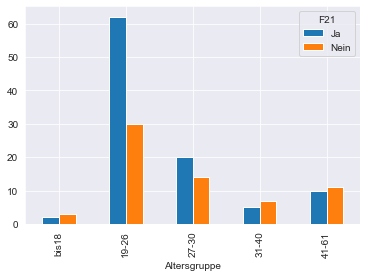

In [44]:
df=df.groupby(['Altersgruppe','F21']).size()
df_app=df_app.unstack()
df_app.plot(kind='bar')

<AxesSubplot:xlabel='Altersgruppe'>

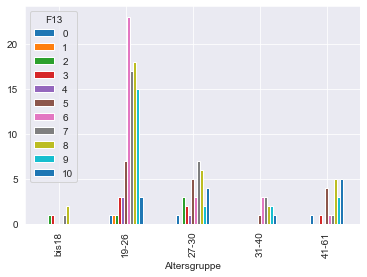

In [48]:
#Regional
df_regional=df.groupby(['Altersgruppe','F13']).size()
df_regional=df_regional.unstack()
df_regional.plot(kind='bar')

In [59]:
#Regional
print(df_regional.apply(pd.Series.describe, axis=1))


              count      mean       std  min  25%  50%   75%   max
Altersgruppe                                                      
bis18          11.0  0.454545  0.687552  0.0  0.0  0.0   1.0   2.0
19-26          11.0  8.363636  8.225238  1.0  2.0  3.0  16.0  23.0
27-30          11.0  3.090909  2.211540  0.0  1.5  3.0   4.5   7.0
31-40          11.0  1.090909  1.221028  0.0  0.0  1.0   2.0   3.0
41-61          11.0  1.909091  1.972539  0.0  0.5  1.0   3.5   5.0


<AxesSubplot:xlabel='Altersgruppe'>

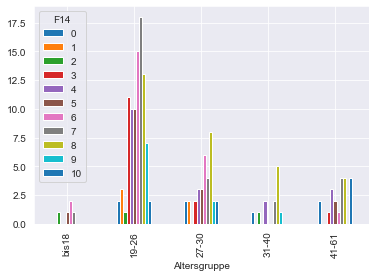

In [61]:
#Bio
df_bio=df.groupby(['Altersgruppe','F14']).size()
df_bio=df_bio.unstack()
df_bio.plot(kind='bar')

In [62]:
#Bio
print(df_bio.apply(pd.Series.describe, axis=1))

              count      mean       std  min  25%   50%   75%   max
Altersgruppe                                                       
bis18          11.0  0.454545  0.687552  0.0  0.0   0.0   1.0   2.0
19-26          11.0  8.363636  5.801254  1.0  2.5  10.0  12.0  18.0
27-30          11.0  3.090909  2.211540  0.0  2.0   2.0   3.5   8.0
31-40          11.0  1.090909  1.513575  0.0  0.0   1.0   1.5   5.0
41-61          11.0  1.909091  1.640399  0.0  0.5   2.0   3.5   4.0


<AxesSubplot:xlabel='Altersgruppe'>

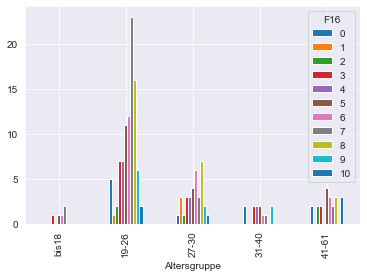

In [64]:
#Fairtrade
df_fair=df.groupby(['Altersgruppe','F16']).size()
df_fair=df_fair.unstack()
df_fair.plot(kind='bar')

In [65]:
#Fairtrade
print(df_fair.apply(pd.Series.describe, axis=1))

              count      mean       std  min  25%  50%   75%   max
Altersgruppe                                                      
bis18          11.0  0.454545  0.687552  0.0  0.0  0.0   1.0   2.0
19-26          11.0  8.363636  6.697354  1.0  3.5  7.0  11.5  23.0
27-30          11.0  3.090909  1.972539  1.0  1.5  3.0   3.5   7.0
31-40          11.0  1.090909  0.943880  0.0  0.0  1.0   2.0   2.0
41-61          11.0  1.909091  1.375103  0.0  1.0  2.0   3.0   4.0


<AxesSubplot:xlabel='Altersgruppe'>

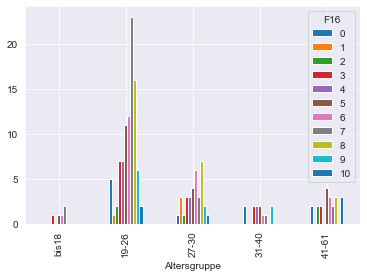

In [70]:
#Wichtigkeit eigene Gesundheit
df_gesundheit=df.groupby(['Altersgruppe','F16']).size()
df_gesundheit=df_gesundheit.unstack()
df_gesundheit.plot(kind='bar')

In [79]:
#Wichtigkeit eigene Gesundheit
print(df_gesundheit.apply(pd.Series.describe, axis=1))

              count      mean       std  min  25%  50%   75%   max
Altersgruppe                                                      
bis18          11.0  0.454545  0.687552  0.0  0.0  0.0   1.0   2.0
19-26          11.0  8.363636  6.697354  1.0  3.5  7.0  11.5  23.0
27-30          11.0  3.090909  1.972539  1.0  1.5  3.0   3.5   7.0
31-40          11.0  1.090909  0.943880  0.0  0.0  1.0   2.0   2.0
41-61          11.0  1.909091  1.375103  0.0  1.0  2.0   3.0   4.0


<AxesSubplot:xlabel='Altersgruppe'>

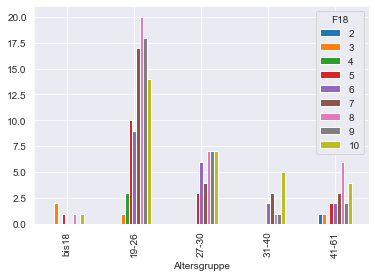

In [81]:
#Wichtigkeit Fitness und das eigene Körpergewicht
df_fit=df.groupby(['Altersgruppe','F18']).size()
df_fit=df_fit.unstack()
df_fit.plot(kind='bar')

In [82]:
#Wichtigkeit eigene Fitness
print(df_fit.apply(pd.Series.describe, axis=1))

              count       mean       std  min  25%   50%   75%   max
Altersgruppe                                                        
bis18           9.0   0.555556  0.726483  0.0  0.0   0.0   1.0   2.0
19-26           9.0  10.222222  7.579211  0.0  3.0  10.0  17.0  20.0
27-30           9.0   3.777778  3.153481  0.0  0.0   4.0   7.0   7.0
31-40           9.0   1.333333  1.732051  0.0  0.0   1.0   2.0   5.0
41-61           9.0   2.333333  1.802776  0.0  1.0   2.0   3.0   6.0


In [83]:
print(df['F24'])

0                                                    app
1                                                   Nike
2                                                    123
3                               Nike, Yazio, Springlane 
4                                                  Keine
                             ...                        
160    Keine. Und ich habe auch nicht vor jemals so e...
161    Chefkoch, Kitchen Stories Rezepte, Bauchmuskel...
162                                                Keine
163                                   manchmal Runtastic
164                                                keine
Name: F24, Length: 165, dtype: object


In [85]:
df_used_apps = df.drop(df[df.F24 == "keine"].index)
df_used_apps = df.drop(df[df.F24 == ""].index)


In [86]:
df_used_apps = df.groupby('F24')['ID'].nunique()
print(df_used_apps)
df_used_apps.to_csv("Used_Apps_Liste.csv")

F24
"Frag Ingrid": App zum Thema Nahrungsmittel-Verträglichkeit bei Intoleranzen    1
-                                                                               6
--                                                                              1
/                                                                               1
123                                                                             1
                                                                               ..
health iphone                                                                   1
keine                                                                           8
keine                                                                           1
manchmal Runtastic                                                              1
mii                                                                             1
Name: ID, Length: 112, dtype: int64


<AxesSubplot:xlabel='Altersgruppe'>

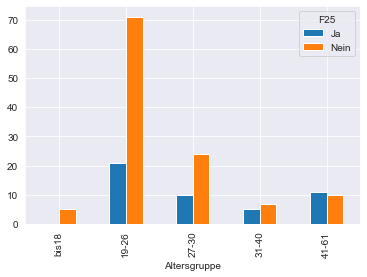

In [91]:
#Wearable
df_wear=df.groupby(['Altersgruppe','F25']).size()
df_wear=df_wear.unstack()
df_wear.plot(kind='bar')

<AxesSubplot:xlabel='Altersgruppe'>

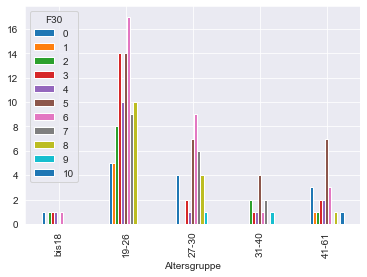

In [93]:
#Wichtigkeit der Marke
df_brand=df.groupby(['Altersgruppe','F30']).size()
df_brand=df_brand.unstack()
df_brand.plot(kind='bar')

In [94]:
#Wichtigkeit der Marke
print(df_brand.apply(pd.Series.describe, axis=1))

              count      mean       std  min  25%  50%   75%   max
Altersgruppe                                                      
bis18          11.0  0.454545  0.522233  0.0  0.0  0.0   1.0   1.0
19-26          11.0  8.363636  5.536655  0.0  5.0  9.0  12.0  17.0
27-30          11.0  3.090909  3.144982  0.0  0.5  2.0   5.0   9.0
31-40          11.0  1.090909  1.221028  0.0  0.0  1.0   1.5   4.0
41-61          11.0  1.909091  1.972539  0.0  1.0  1.0   2.5   7.0


<AxesSubplot:xlabel='Altersgruppe'>

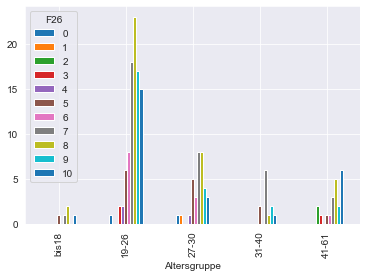

In [95]:
#Erhalt der Umwelt
df_environment=df.groupby(['Altersgruppe','F26']).size()
df_environment=df_environment.unstack()
df_environment.plot(kind='bar')

In [96]:
#Erhalt der Umwelt
print(df_environment.apply(pd.Series.describe, axis=1))

              count      mean       std  min  25%  50%   75%   max
Altersgruppe                                                      
bis18          11.0  0.454545  0.687552  0.0  0.0  0.0   1.0   2.0
19-26          11.0  8.363636  8.405626  0.0  1.5  6.0  16.0  23.0
27-30          11.0  3.090909  2.913916  0.0  1.0  3.0   4.5   8.0
31-40          11.0  1.090909  1.814086  0.0  0.0  0.0   1.5   6.0
41-61          11.0  1.909091  2.022600  0.0  0.5  1.0   2.5   6.0


<AxesSubplot:xlabel='Altersgruppe'>

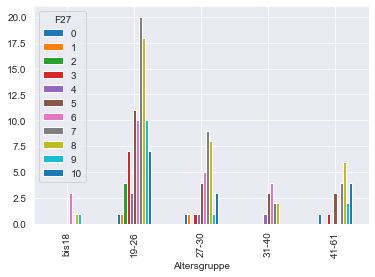

In [98]:
#Nachhaltigkeit einer Firma
df_sus=df.groupby(['Altersgruppe','F27']).size()
df_sus=df_sus.unstack()
df_sus.plot(kind='bar')

In [99]:
#Nachhaltigkeit einer Firma
print(df_sus.apply(pd.Series.describe, axis=1))

              count      mean       std  min  25%  50%   75%   max
Altersgruppe                                                      
bis18          11.0  0.454545  0.934199  0.0  0.0  0.0   0.5   3.0
19-26          11.0  8.363636  6.328866  1.0  3.5  7.0  10.5  20.0
27-30          11.0  3.090909  3.080732  0.0  1.0  1.0   4.5   9.0
31-40          11.0  1.090909  1.445998  0.0  0.0  0.0   2.0   4.0
41-61          11.0  1.909091  2.071451  0.0  0.0  1.0   3.5   6.0
